Tujuan : Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

In [12]:
import pandas as pd

#membuat dataframe 
df = pd.read_csv('source/Mall_Customers.csv')

#menampilkan 3 data teratas
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
#ubah nama kolom
df = df.rename(columns={
    'Gender': 'gender', 
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

#ubah kategorik menjadi numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11

In [14]:
from sklearn.cluster import KMeans

#menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inersia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

Text(0, 0.5, 'inertia')

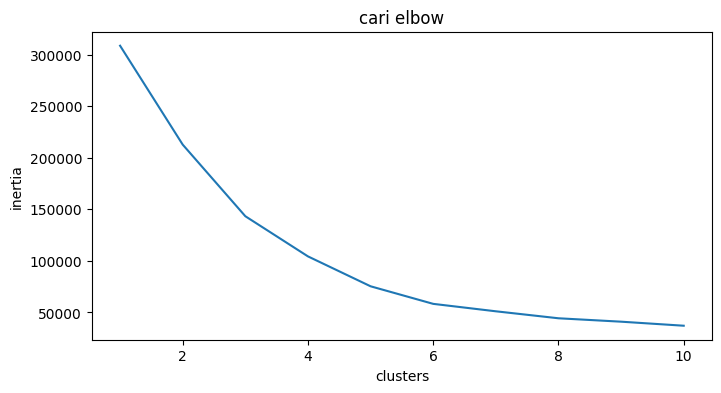

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('cari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


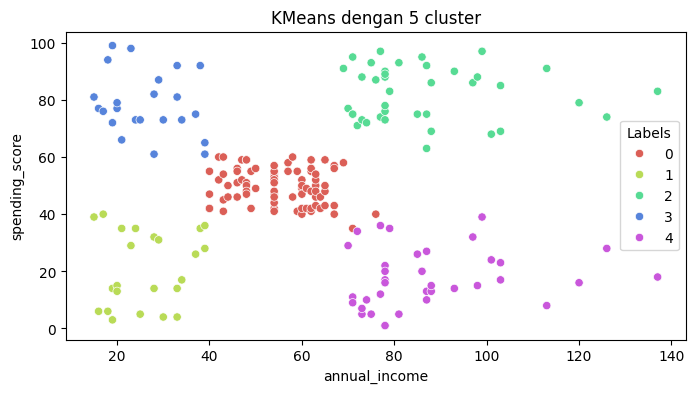

In [16]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom labels pada dataset
X['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 cluster')
plt.show()